In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Confirming the working directory!

In [2]:
from os import chdir, getcwd
wd=getcwd()
wd
chdir(wd)
wd

'C:\\Users\\Vishal\\Desktop\\ML-DSE BITS\\Webinar 1 Linear Regression'

# importing data and understanding statistics of data

In [3]:
df=pd.read_csv('data.csv',encoding=' ISO-8859-1')
df.head(3)

C:\Users\Vishal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01


In [4]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [6]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


# Exploratory Data Analysis

In [8]:
df.corr()

,so2,no2,rspm,spm,pm2_5
so2,1.000000,0.340555,0.165325,0.148325,0.035980
no2,0.340555,1.000000,0.369923,0.326170,0.509357
rspm,0.165325,0.369923,1.000000,0.801752,0.754709
spm,0.148325,0.326170,0.801752,1.000000,NaN
pm2_5,0.035980,0.509357,0.754709,NaN,1.000000


In [9]:
df.isna().sum(axis=0)

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

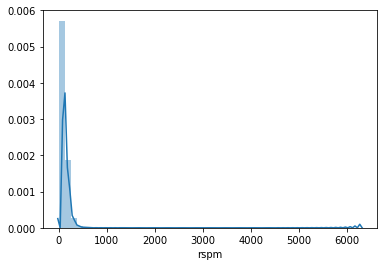

In [10]:
sns.distplot(df['rspm'].fillna(0))

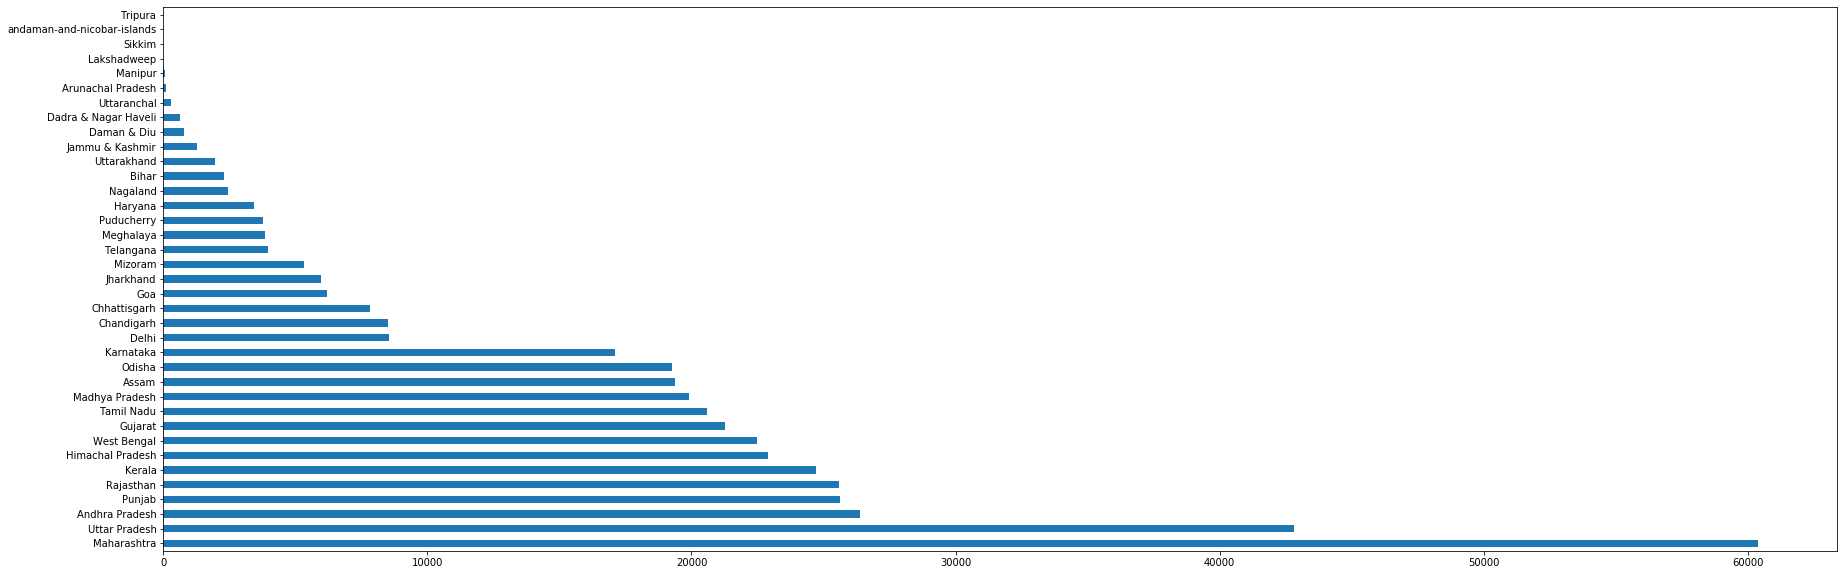

In [11]:
#number of data points for each state
df['state'].value_counts().plot(kind='barh',figsize=(30,10))

C:\Users\Vishal\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Vishal\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


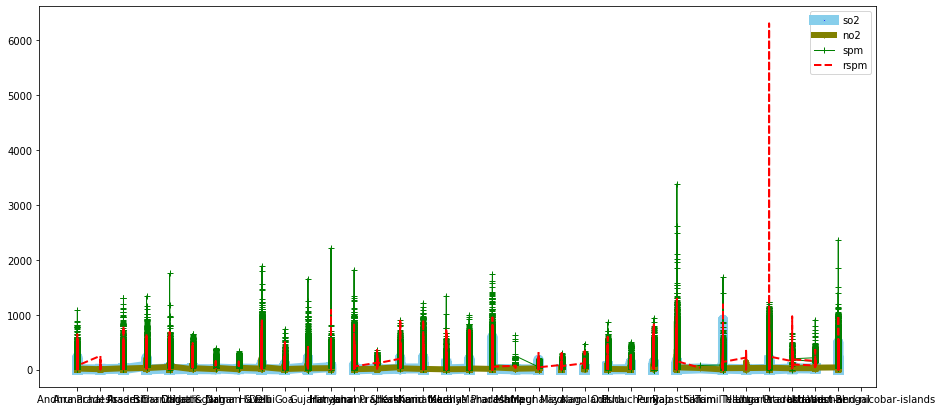

In [11]:
# multiplelines for so2,no,rspm for visualizing the trend according to states
plt.rcParams['figure.figsize'] = (15, 7)
# multiplelines for so2,no,rspm for visualizing the trend according to states
plt.plot( 'state', 'so2', data=df, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=10)
plt.plot( 'state', 'no2', data=df, marker='+', color='olive', linewidth=6)
plt.plot( 'state', 'spm', data=df, marker='+', color='green', linewidth=1)
plt.plot( 'state', 'rspm', data=df, marker='', color='red', linewidth=2, linestyle='dashed', label="rspm")
plt.legend()

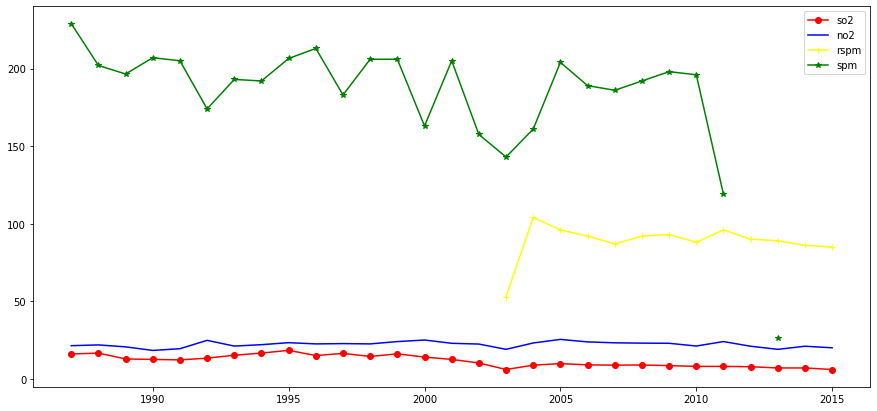

In [12]:
#understanding trends according to year
import datetime
from datetime import date 
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d') 
df['year'] = df['date'].dt.year # year

#so2,no2,rspm,spm trends
trend_df = df[['so2','no2','rspm','spm','year']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
plt.plot('year','so2', data=trend_df,color='red',marker='o')
plt.plot('year','no2', data=trend_df,color='blue',marker='')
plt.plot('year','rspm', data=trend_df,color='yellow',marker='+')
plt.plot('year','spm', data=trend_df,color='green',marker='*')
plt.legend()

Text(0.5, 1.0, 'Average so2 observed in each state')

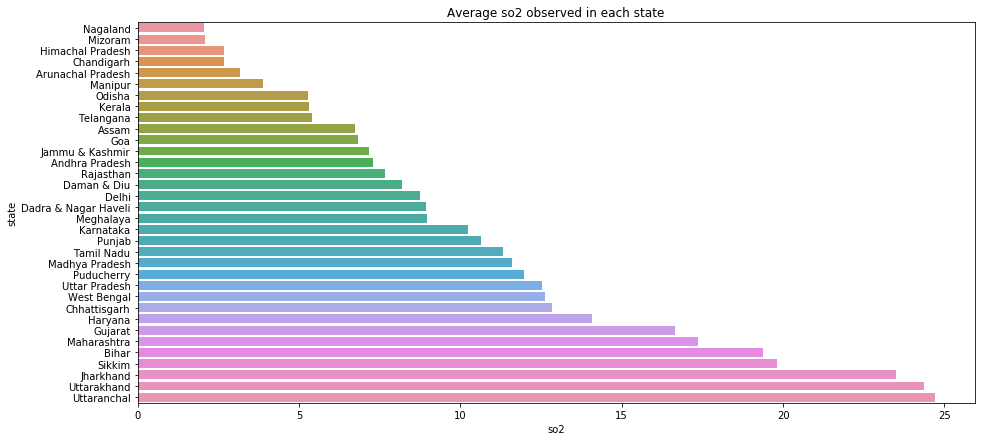

In [13]:
#Understanding the parameters for each state(Removing the effect of missing values)
state_so2=df[['state','so2']].dropna().groupby('state').mean().sort_values(by='so2')
sns.barplot(x='so2', y=state_so2.index, data=state_so2).set_title("Average so2 observed in each state")


Text(0.5, 1.0, 'Average no2 observed in each state')

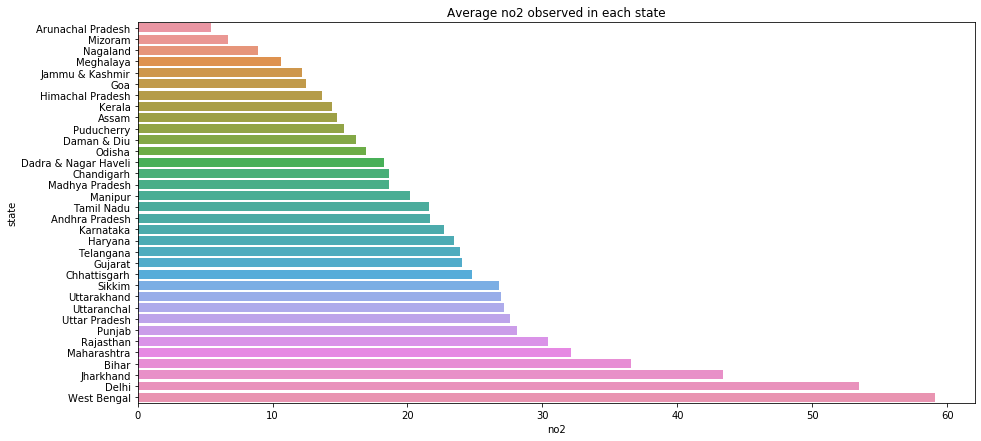

In [14]:
state_no2=df[['state','no2']].dropna().groupby('state').mean().sort_values(by='no2')
sns.barplot(x='no2', y=state_no2.index, data=state_no2).set_title("Average no2 observed in each state")


Text(0.5, 1.0, 'Average rspm observed in each state')

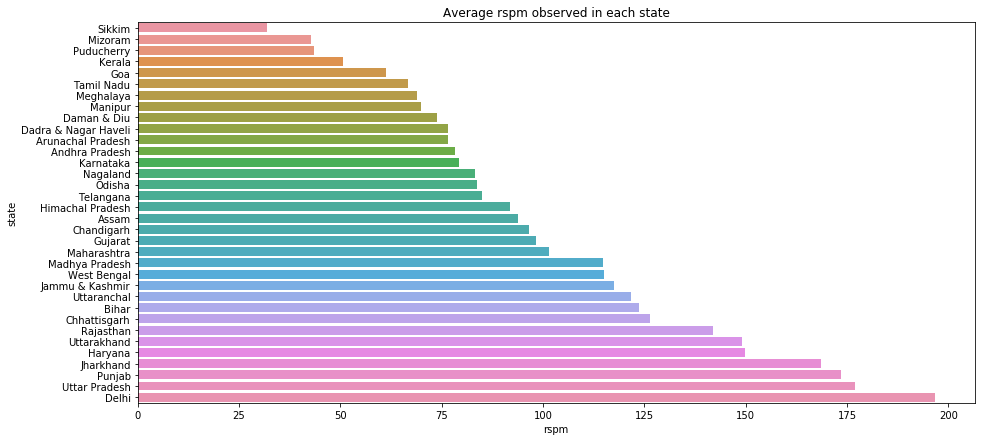

In [15]:
state_rspm=df[['state','rspm']].dropna().groupby('state').mean().sort_values(by='rspm')
sns.barplot(x='rspm', y=state_rspm.index, data=state_rspm).set_title("Average rspm observed in each state")

Text(0.5, 1.0, 'Average spm observed in each state')

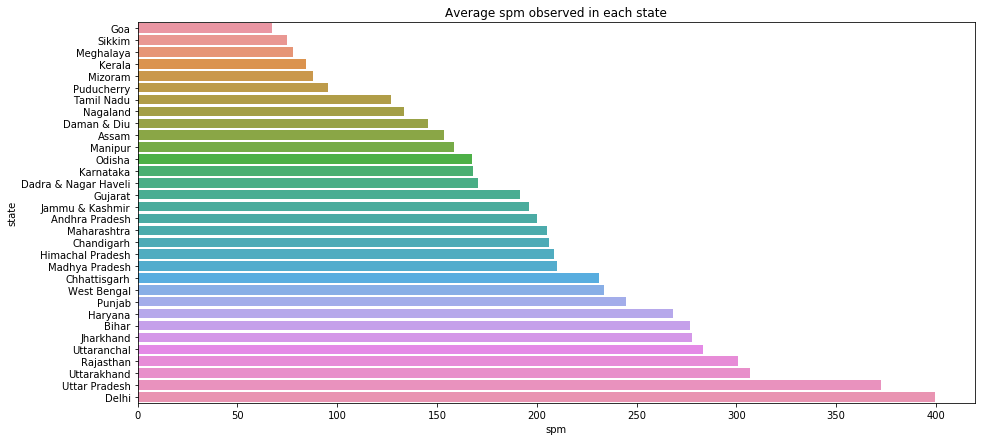

In [16]:
state_spm=df[['state','spm']].dropna().groupby('state').mean().sort_values(by='spm')
sns.barplot(x='spm', y=state_spm.index, data=state_spm).set_title("Average spm observed in each state")

Text(0.5, 1.0, 'Average pm2_5observed in each state')

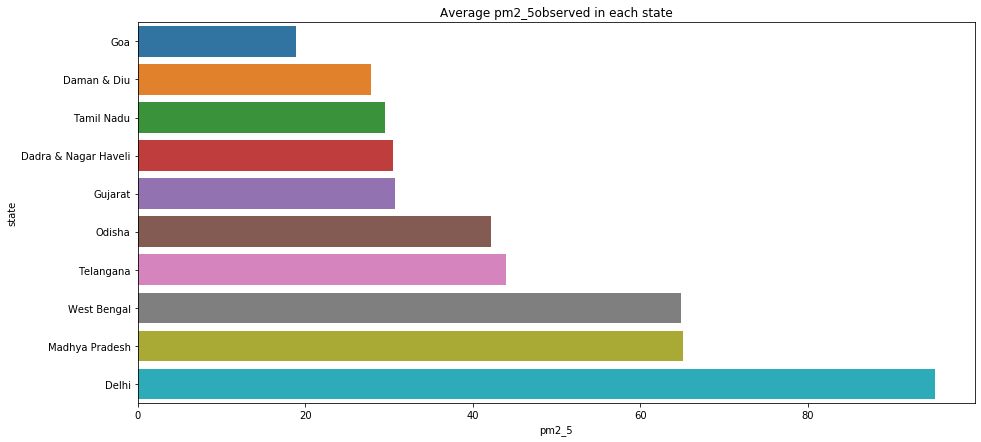

In [17]:
state_pm2_5=df[['state','pm2_5']].dropna().groupby('state').mean().sort_values(by='pm2_5')
sns.barplot(x='pm2_5', y=state_pm2_5.index, data=state_pm2_5).set_title("Average pm2_5observed in each state")

# Predictive modelling for rspm in Delhi,inspired by recent air pollution concerns in Delhi

In [18]:
new_df=df.loc[df['state'] == "Delhi"]
new_df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
65861,60,9/1/1987,Delhi,Delhi,Central Pollution Control Board,Residential,8.6,16.2,NaN,323.0,NaN,NaN,1987-01-09,1987.0
65862,59,9/2/1987,Delhi,Delhi,Central Pollution Control Board,Residential,6.5,9.3,NaN,488.0,NaN,NaN,1987-02-09,1987.0
65863,58,9/3/1987,Delhi,Delhi,Central Pollution Control Board,Industrial,25.8,10.4,NaN,487.0,NaN,NaN,1987-03-09,1987.0
65864,57,9/3/1987,Delhi,Delhi,Central Pollution Control Board,Industrial,0.5,2.8,NaN,528.0,NaN,NaN,1987-03-09,1987.0
65865,56,9/2/1987,Delhi,Delhi,Central Pollution Control Board,Industrial,2.5,12.8,NaN,506.0,NaN,NaN,1987-02-09,1987.0
65866,55,9/2/1987,Delhi,Delhi,Central Pollution Control Board,Industrial,16.4,17.2,NaN,371.0,NaN,NaN,1987-02-09,1987.0
65867,60,10/3/1987,Delhi,Delhi,Central Pollution Control Board,Residential,3.1,14.9,NaN,414.0,NaN,NaN,1987-03-10,1987.0
65868,59,10/4/1987,Delhi,Delhi,Central Pollution Control Board,Residential,14.2,14.6,NaN,337.0,NaN,NaN,1987-04-10,1987.0
65869,58,10/1/1987,Delhi,Delhi,Central Pollution Control Board,Industrial,27.3,13.2,NaN,372.0,NaN,NaN,1987-01-10,1987.0
65870,57,10/1/1987,Delhi,Delhi,Central Pollution Control Board,Industrial,40.5,22.5,NaN,638.0,NaN,NaN,1987-01-10,1987.0


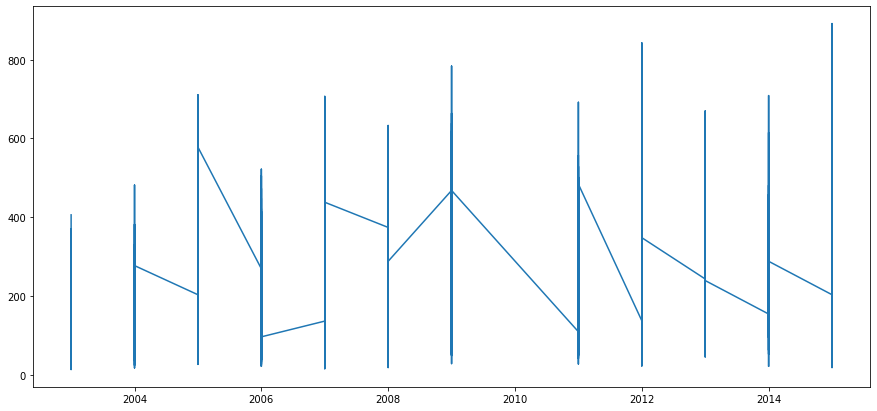

In [19]:
plt.plot('year','rspm',data=new_df)

In [20]:
X = new_df['year'].fillna(0).values.reshape(-1,1)
y = new_df['rspm'].fillna(0).values.reshape(-1,1)

In [21]:
#splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [22]:
# training linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regressor = LinearRegression()
regmodel=regressor.fit(X_train, y_train)
regmodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred


array([[120.01086181],
       [180.89436397],
       [-50.46294426],
       ...,
       [253.95456658],
       [107.83416137],
       [ 10.4205579 ]])

# Analysis of results and model evaluation

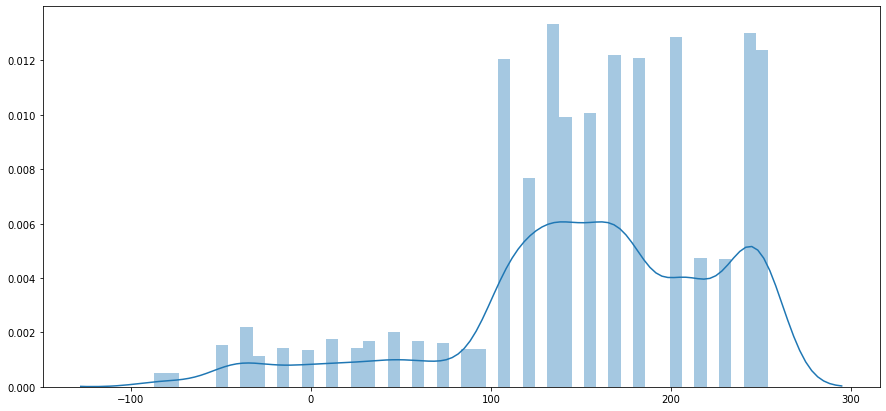

In [24]:
sns.distplot((y_pred),bins=50)

In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 82.71496808740066
MSE: 12173.760354685495
RMSE: 110.33476494145214


In [27]:
print('Score: %.2f' % regressor.score(X, y))

Score: 0.31


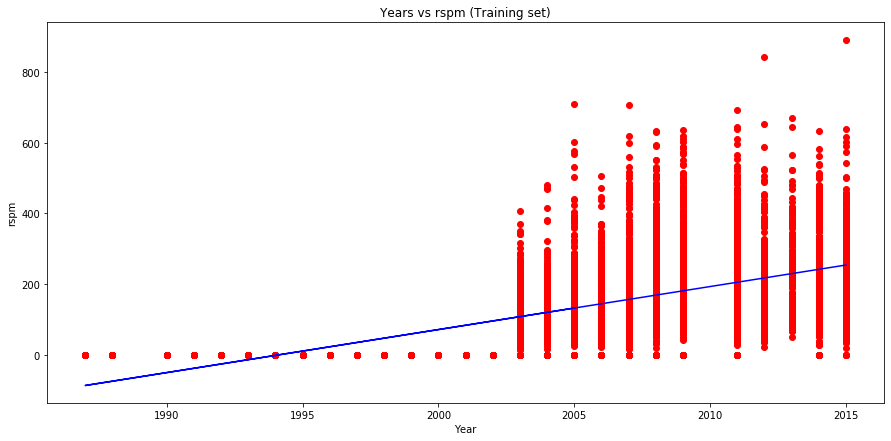

In [28]:
# Visualising the Training set results
regressor.predict(X_train)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Years vs rspm (Training set)')
plt.xlabel('Year')
plt.ylabel('rspm')
plt.show()

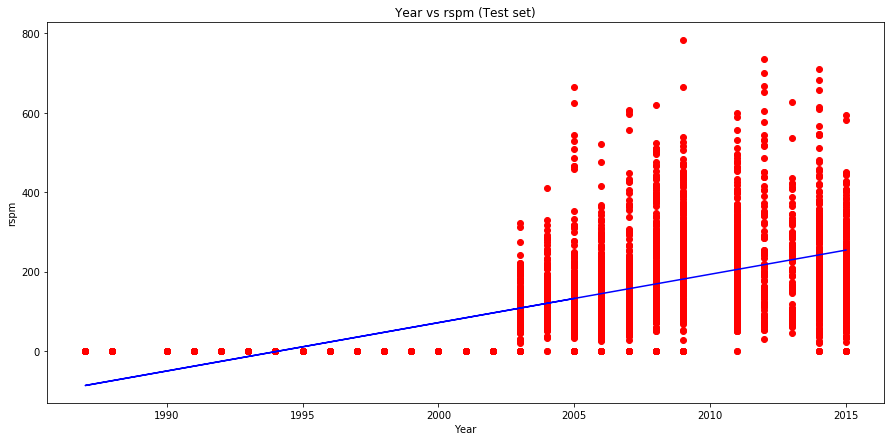

In [29]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Year vs rspm (Test set)')
plt.xlabel('Year')
plt.ylabel('rspm')
plt.show()

# saving the model and making predictions

In [30]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [31]:
#load the saved regression model
import pickle
filename = 'LinearRegression_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [32]:
#predict rspm for the years 2020,2030,2040,2050 in Delhi
X1=(2020.0,2030.0,2040.0,2050.0)
PP=np.array(X1).reshape(-1,1)
import pickle
loaded_model = pickle.load(open('LinearRegression_model.sav', 'rb'))
predictions=[]  
predictions = loaded_model.predict(PP)
predictions


array([[314.83806874],
       [436.60507308],
       [558.37207741],
       [680.13908175]])